In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

images\normal\1.jpg
images\normal\10.jpg
images\normal\100.jpg
images\normal\101.jpg
images\normal\102.jpg
images\normal\103.jpg
images\normal\104.jpg
images\normal\105.jpg
images\normal\106.jpg
images\normal\107.jpg
images\normal\108.jpg
images\normal\109.jpg
images\normal\11.jpg
images\normal\110.jpg
images\normal\111.jpg
images\normal\112.jpg
images\normal\113.jpg
images\normal\114.jpg
images\normal\115.jpg
images\normal\116.jpg
images\normal\117.jpg
images\normal\118.jpg
images\normal\119.jpg
images\normal\12.jpg
images\normal\120.jpg
images\normal\121.jpg
images\normal\122.jpg
images\normal\123.jpg
images\normal\124.jpg
images\normal\125.jpg
images\normal\126.jpg
images\normal\127.jpg
images\normal\128.jpg
images\normal\129.jpg
images\normal\13.jpg
images\normal\130.jpg
images\normal\131.jpg
images\normal\132.jpg
images\normal\133.jpg
images\normal\134.jpg
images\normal\135.jpg
images\normal\136.jpg
images\normal\137.jpg
images\normal\138.jpg
images\normal\139.jpg
images\normal\14

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

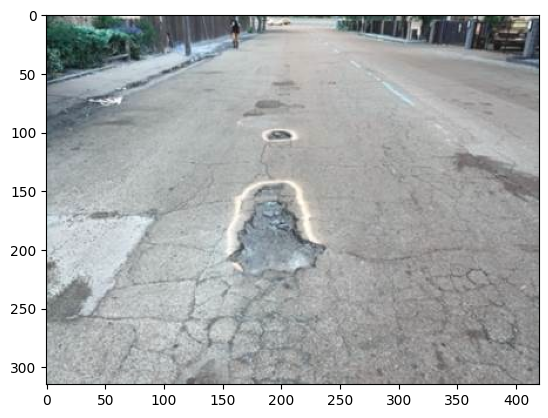

In [3]:
plt.imshow(cv2.imread("images/potholes/125.jpg"))

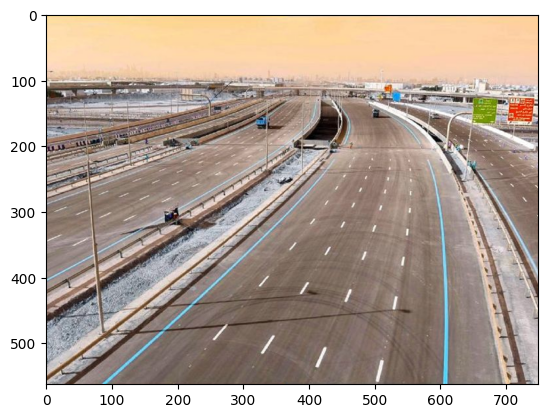

In [4]:
plt.imshow(cv2.imread("images/normal/11.jpg"))

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)
training_set = train_datagen.flow_from_directory('images',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset="training")

Found 546 images belonging to 2 classes.


In [7]:
validation_generator = train_datagen.flow_from_directory(
    "images", # same directory as training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 136 images belonging to 2 classes.


In [8]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(x = training_set, validation_data = validation_generator, epochs = 25)

Epoch 1/25
18/18 [==============================] - 29s 2s/step - loss: 0.6201 - accuracy: 0.6282 - val_loss: 0.4907 - val_accuracy: 0.7868
Epoch 2/25
18/18 [==============================] - 13s 711ms/step - loss: 0.4512 - accuracy: 0.8004 - val_loss: 0.5347 - val_accuracy: 0.7353
Epoch 3/25
18/18 [==============================] - 11s 627ms/step - loss: 0.3731 - accuracy: 0.8352 - val_loss: 0.4671 - val_accuracy: 0.7794
Epoch 4/25
18/18 [==============================] - 12s 687ms/step - loss: 0.2788 - accuracy: 0.8864 - val_loss: 0.3748 - val_accuracy: 0.8088
Epoch 5/25
18/18 [==============================] - 12s 705ms/step - loss: 0.2244 - accuracy: 0.9121 - val_loss: 0.3560 - val_accuracy: 0.8456
Epoch 6/25
18/18 [==============================] - 11s 635ms/step - loss: 0.1879 - accuracy: 0.9249 - val_loss: 0.3788 - val_accuracy: 0.8603
Epoch 7/25
18/18 [==============================] - 11s 635ms/step - loss: 0.1983 - accuracy: 0.9231 - val_loss: 0.3610 - val_accuracy: 0.8235
Ep

In [9]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('images/potholes/10.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'normal'

#final result 
print(prediction)

1/1 [==============================] - 0s 320ms/step
pothole


In [11]:
import socket
import time
import numpy as np
from keras.preprocessing import image

# Client configuration
server_ip = "127.0.0.1"
server_port = 12345

# Create a UDP socket
client_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

while True:
    # Load and preprocess the image
    test_image = image.load_img('images/potholes/10.jpg', target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Make a prediction
    result = cnn.predict(test_image)

    # Check the prediction result
    if result[0][0] == 1:
        pothole_data = "Pothole detected at GPS coordinates: (X, Y)"

        # Send the pothole warning to the server
        client_socket.sendto(pothole_data.encode('utf-8'), (server_ip, server_port))
        print(f"Pothole warning sent to {server_ip}:{server_port}")

        # Add a delay before sending the next warning (replace this with your desired interval)
        time.sleep(5)

        prediction = 'pothole'
    else:
        prediction = 'normal'

    # Print the final prediction result
    print("Final Prediction:", prediction)


1/1 [==============================] - 0s 49ms/step
Pothole warning sent to 127.0.0.1:12345


KeyboardInterrupt: 